![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# <center>Introduction</center>
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/intro.png?raw=true" width="100"/>


---


### Stroke - a sudden change in the blood supply to a part of the brain, sometimes causing a loss of the ability to move particular parts of the body.

### In this work, we will try to analyze all the factors influencing this disease, to extract their influence with Exploratory data analysis and also build a model to predict the possible occurrence of disease in a patient.

# Import libraries
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/upload-icon.png?raw=true" width="100"/>

#### For data manipulation and analysis

In [1]:
import os
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

pd.options.mode.chained_assignment = None

#### For beautiful visualization

In [2]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

#### For work with ML and ANN

In [3]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Loading and Checking Dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/add-to-database.png?raw=true" width="100"/>

In [5]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[0],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600},
                title = {"text": "Rows 🗒 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0.7, 1], 'x': [0, 0.5]}))

fig.add_trace(go.Indicator(
                mode = "number",
                value = data.shape[1],
                number={'font':{'color': '#7b68ee', 'size':100}},
                delta = {"reference": 600, "valueformat": ".0f"},
                title = {"text": "Columns 🏛 <br><span style="
                                 "'font-size:0.7em;color:gray'>in the data</span>"},
                domain = {'y': [0, 0.3], 'x': [0.5, 1]}))
fig.show()

In [8]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


# Missing Values
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/missing.png?raw=true" width="100"/>

In [10]:
mis_val_colors = []

for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')

Text(0.5, 1.15, 'Missing values (before)')

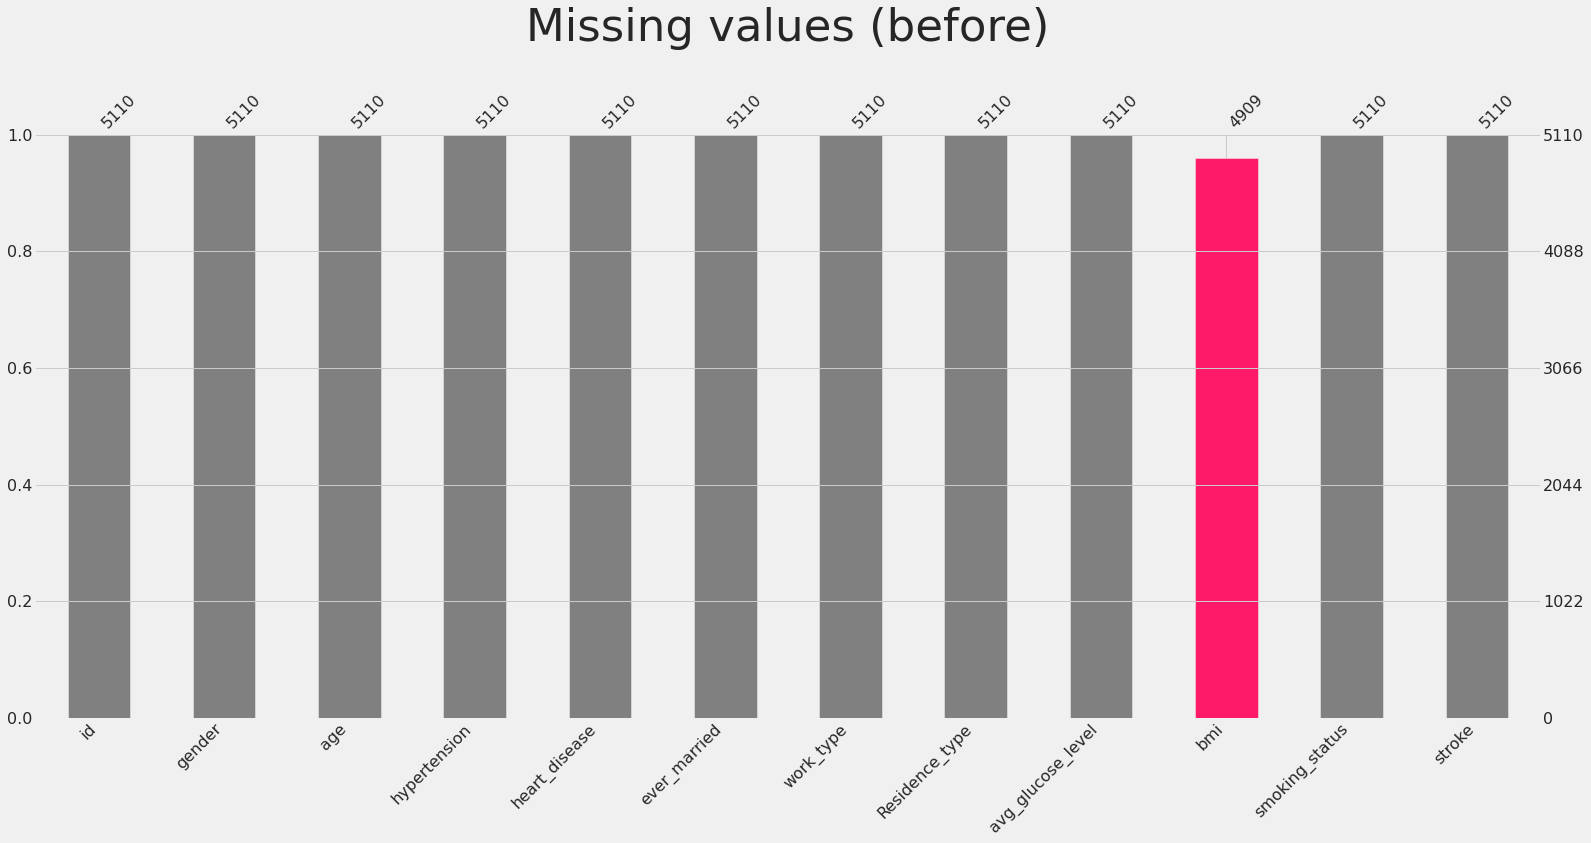

In [11]:
msn.bar(data, color=mis_val_colors)
plt.title('Missing values (before)', size=45, y=1.15)

This dataset has some missing values for BMI (body mass index) column

In [12]:
data['bmi'] = data['bmi'].fillna(np.round(data.bmi.mean(), 2))

In [13]:
mis_val_colors_after = []

for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors_after.append('#fe1969')
    else:
        mis_val_colors_after.append('limegreen')

Text(0.5, 1.15, 'Missing values (after)')

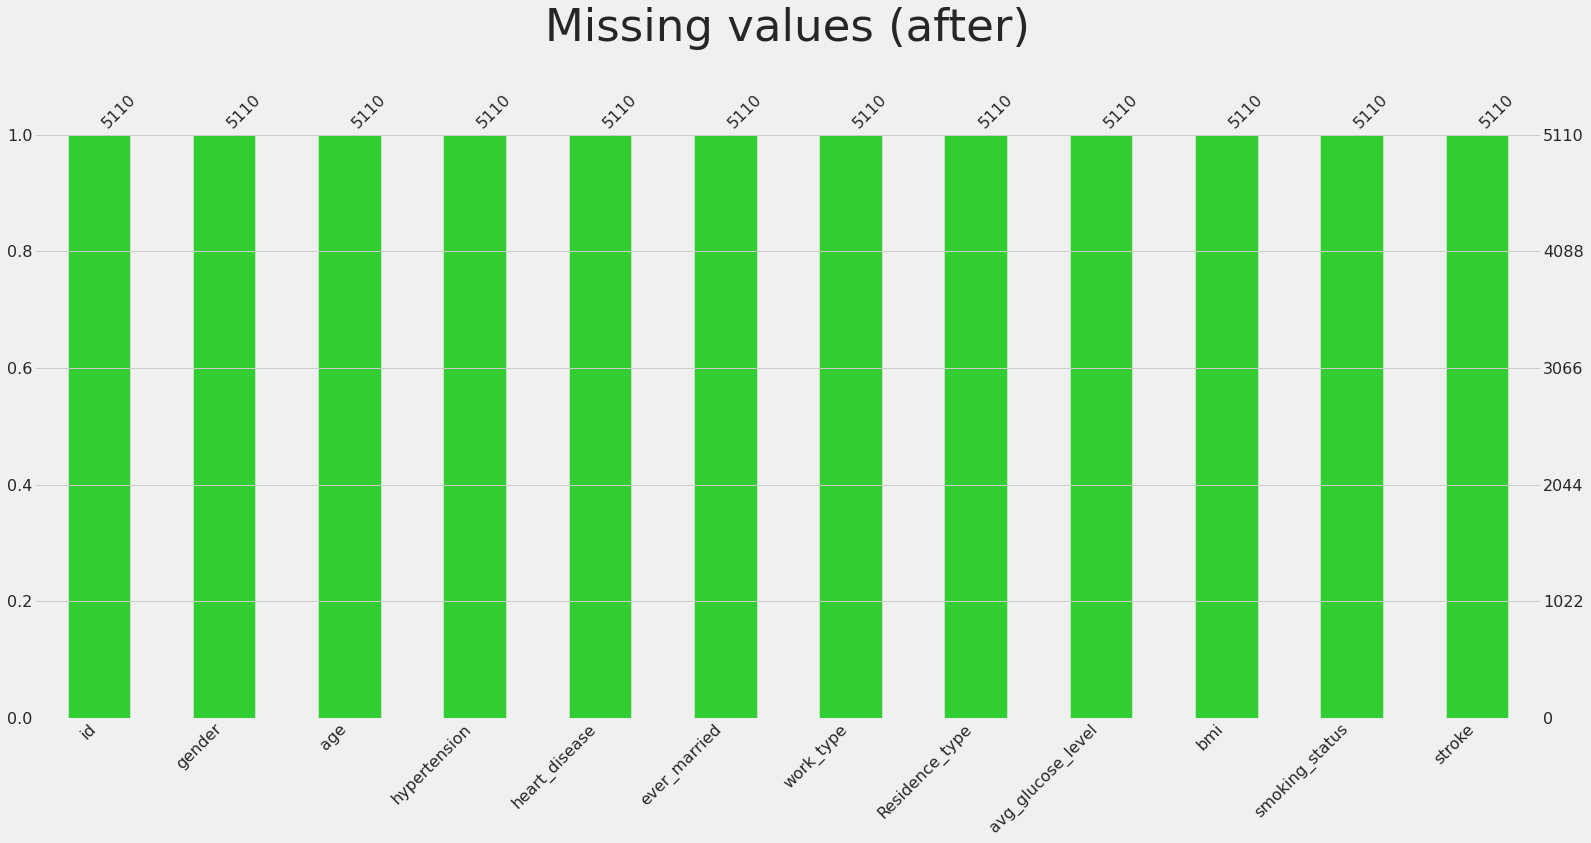

In [14]:
msn.bar(data, color=mis_val_colors_after)
plt.title('Missing values (after)', size=45, y=1.15)

# Distribution of predicted values in the dataset

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/balance.png?raw=true" width="100"/>

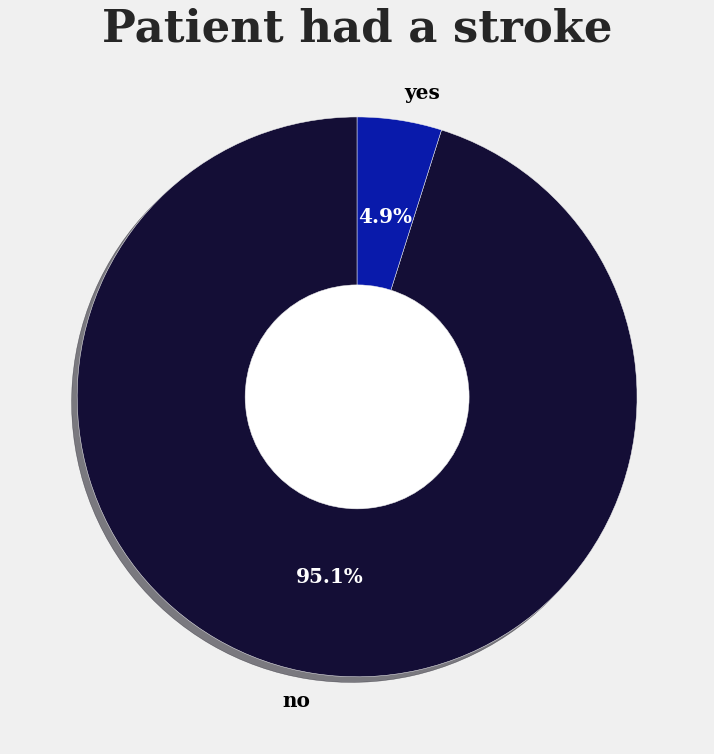

In [15]:
pie_colors = ('#140E36', '#091AAB')

pred_classes = data.stroke.value_counts()

plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['no', 'yes'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 20,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Patient had a stroke', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# EDA + FE: Exploratory Data Analysis + Feature Engineering
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/data%20analysis.png?raw=true" width="100"/>

In [16]:
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

### ID

This column has no regularity with predicted variable

In [17]:
data.drop(['id'], axis=1, inplace=True)

### Gender

In [18]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [19]:
data = data[data.gender != 'Other']

In [20]:
data.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

[Text(0, 0, 'Male'), Text(0, 1, 'Female')]

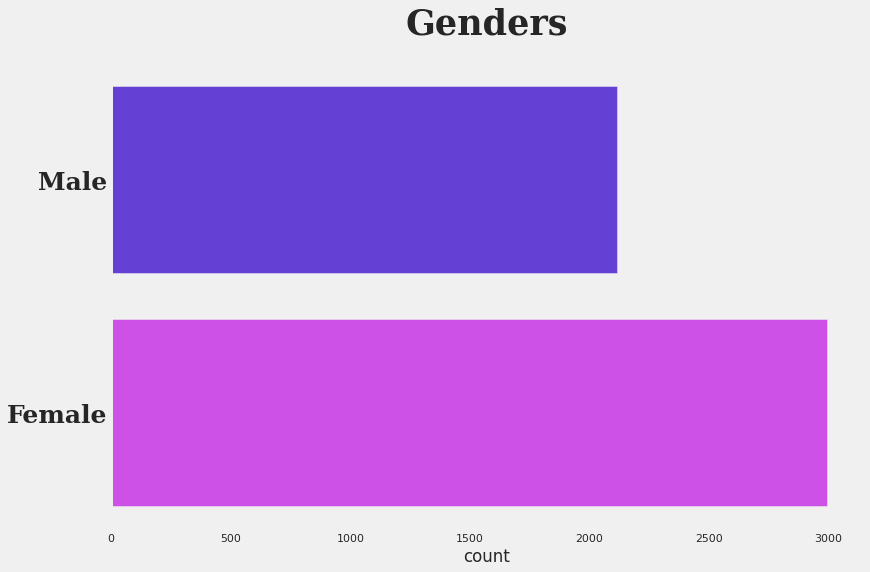

In [21]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(y=data.gender, palette=two_colors[::-1])
gender_plot.set_title('Genders', fontsize=35, y=1.05, **hfont)
gender_plot.set(ylabel=None)
plt.grid(False)
gender_plot.set_yticklabels(gender_plot.get_yticklabels(), size=25, **hfont)

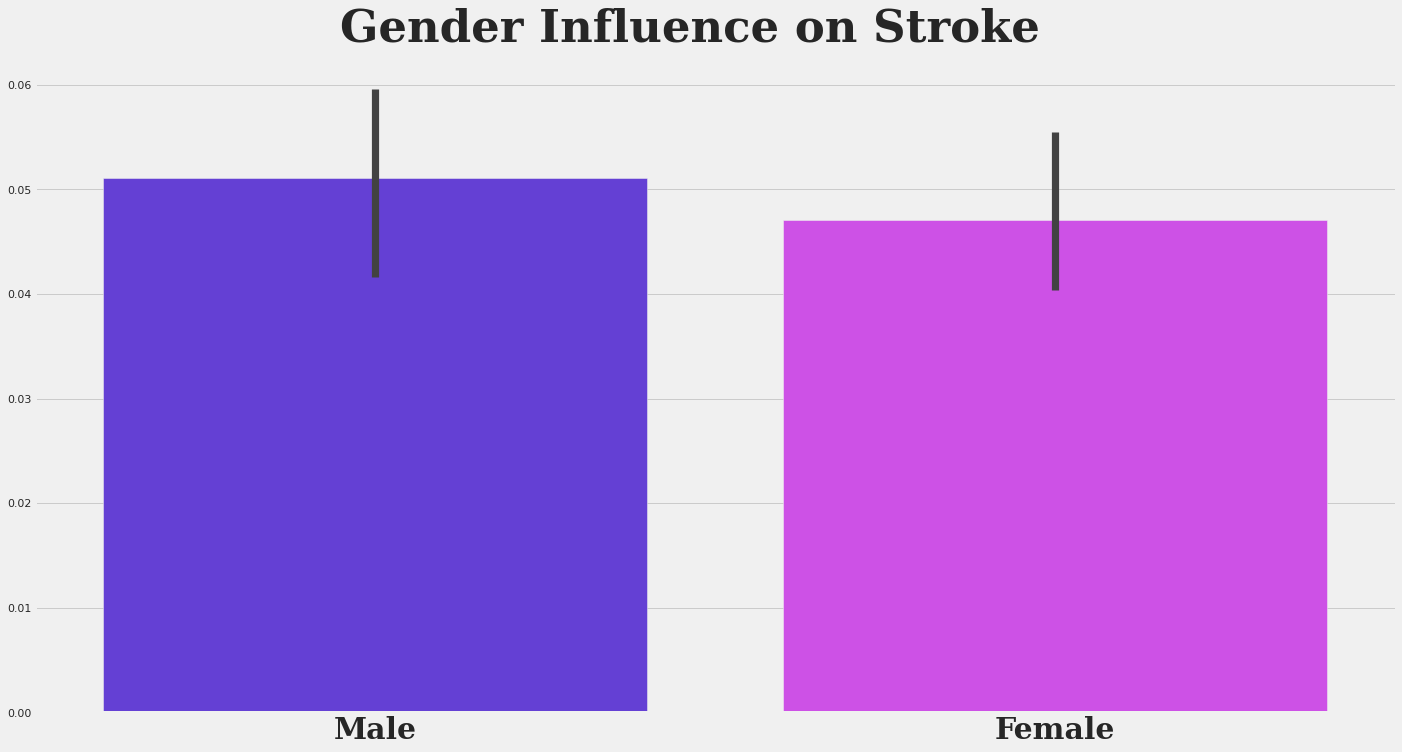

In [22]:
gender_plot = sns.catplot(x='gender', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
gender_plot.set_xticklabels(['Male', 'Female'], size=30, **hfont)
gender_plot.fig.suptitle('Gender Influence on Stroke',
                            size=45, y=1.05, **hfont)
gender_plot.set(xlabel=None, ylabel=None)

### Age

Text(0.5, 0, 'Age')

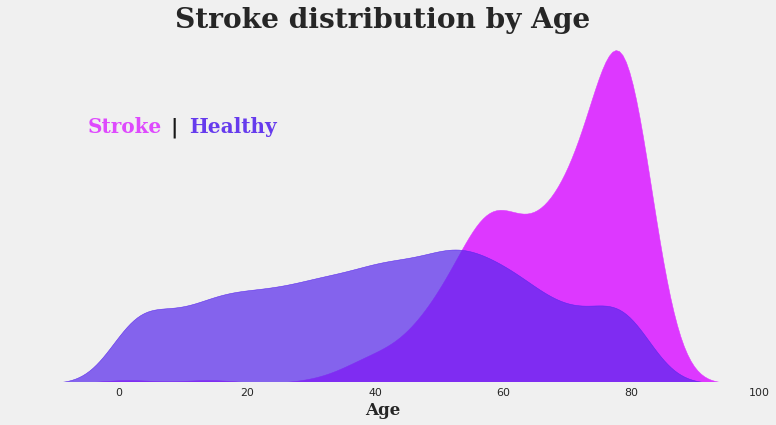

In [23]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by Age', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(-5, 0.03, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(8, 0.03, '|', {'font': 'Serif',
                       'size': '20',
                       'weight': 'bold',
                       'color': 'black'}, alpha=0.9)

ax.text(11, 0.03, 'Healthy', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='age', shade=True, ax=ax, color=two_colors[0], alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='age', shade=True, ax=ax, color=two_colors[1], alpha=0.7)
plt.xlabel('Age', **hfont)

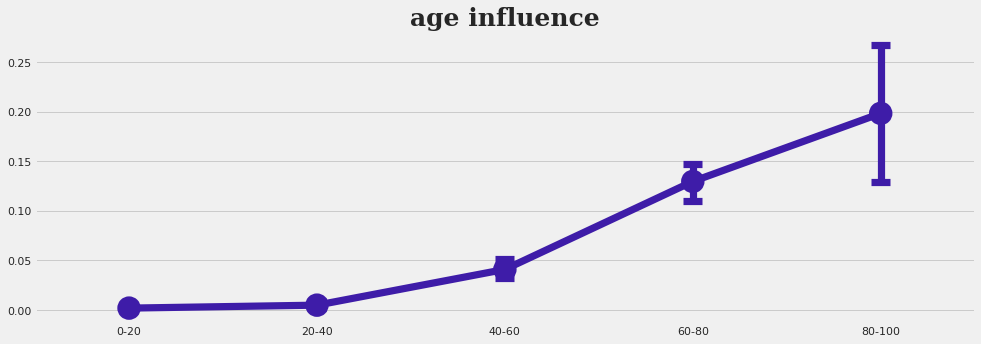

In [24]:
def age_plot(data, col_name):

    age_data = data[[col_name, 'stroke']]
    age_data[col_name] = pd.cut(age_data[col_name],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=['0-20',
                                       '20-40',
                                       '40-60',
                                       '60-80',
                                       '80-100'])

    color = np.random.choice(five_colors, 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=age_data, color=color)
    plot.set_title(f'{col_name} influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


age_plot(data, 'age')

### Hypertension
is a common condition in which the long-term force of the blood
against your artery walls is high enough that it may
eventually cause health problems

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

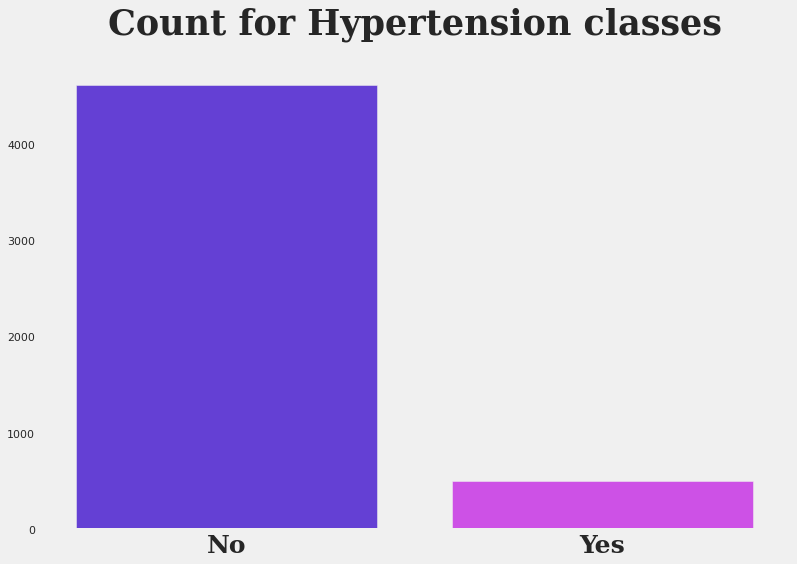

In [25]:
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=data.hypertension,
                            palette=two_colors[::-1])
hypertension_plot.set_title('Count for Hypertension classes',
                      fontsize=35, y=1.05, **hfont)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=25, **hfont)

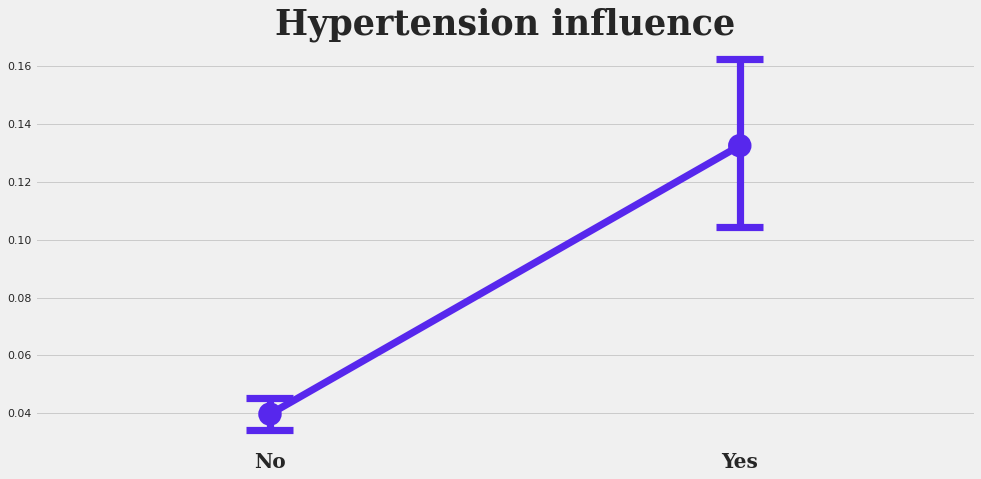

In [26]:
def hypertension_plot(data, col_name):

    hypertension_data = data[[col_name, 'stroke']]

    color = np.random.choice(five_colors, 1)[0]
    plt.figure(figsize=(15, 7))
    hypertension = sns.pointplot(x=col_name, y='stroke',
                           dodge=0.1, capsize=.1,
                           data=hypertension_data,
                           color=color)
    hypertension.set_title('Hypertension influence',
                            fontsize=35, **hfont)
    hypertension.set(xlabel=None, ylabel=None)
    hypertension.set_xticklabels(['No', 'Yes'], size=20, **hfont)


hypertension_plot(data, 'hypertension')

### Heart Disease

Text(0.5, 1.0, 'Heart Disease')

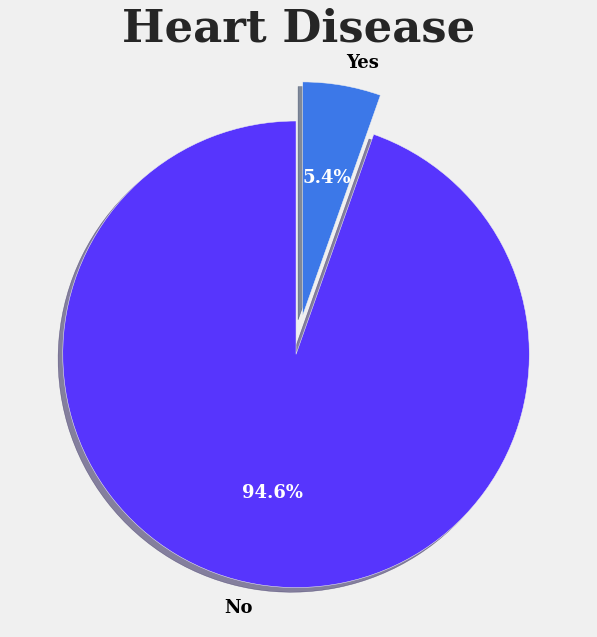

In [27]:
heart_dis_data = data.heart_disease.value_counts()

explode = (0.07, 0.1)
pie_colors = ('#5735FD', '#3C78E8')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(heart_dis_data,
                               labels=['No', 'Yes'],
                               explode=explode,
                               colors=pie_colors,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 18,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Heart Disease', size=45, **hfont)

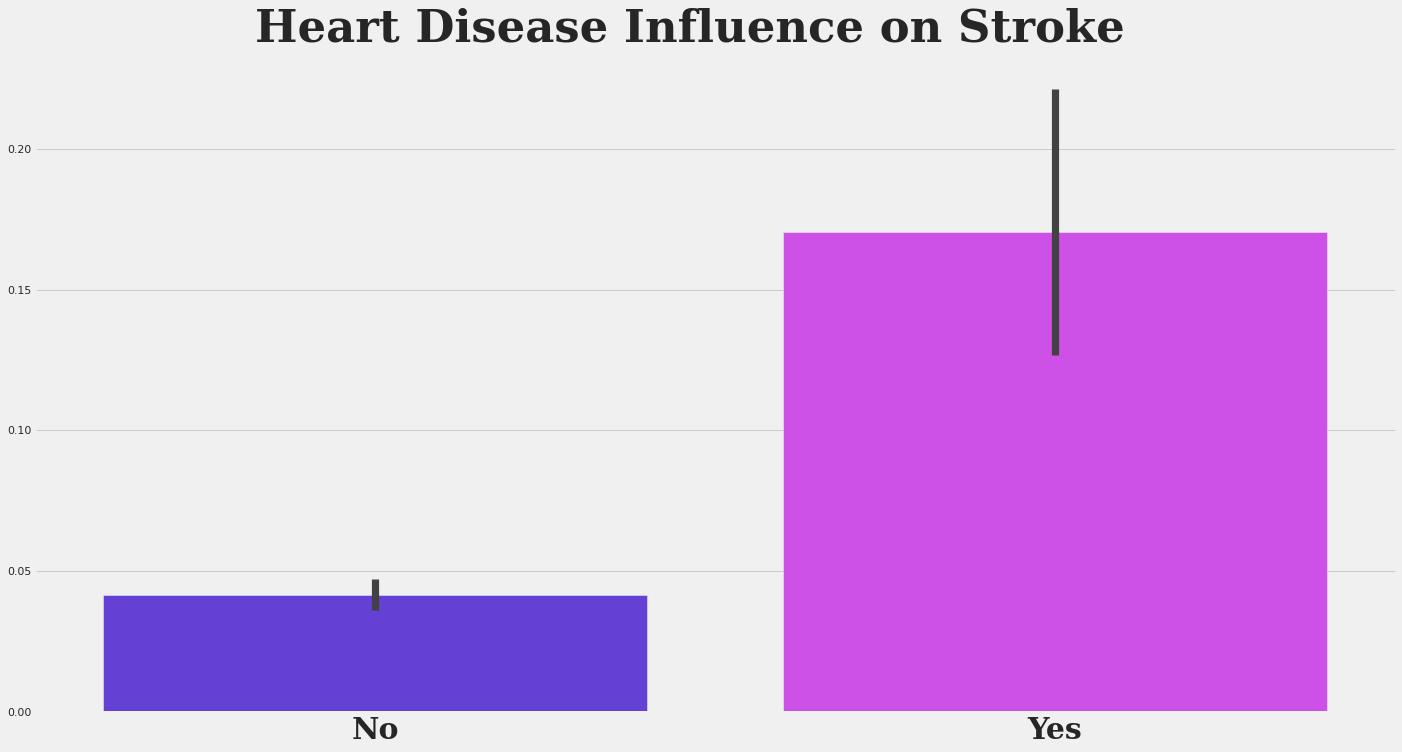

In [28]:
heart_dis_plot = sns.catplot(x='heart_disease', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
heart_dis_plot.set_xticklabels(['No', 'Yes'], size=30, **hfont)
heart_dis_plot.fig.suptitle('Heart Disease Influence on Stroke',
                            size=45, y=1.05, **hfont)
heart_dis_plot.set(xlabel=None, ylabel=None)

### Married

Text(0.5, 1.0, 'Married (y/n)')

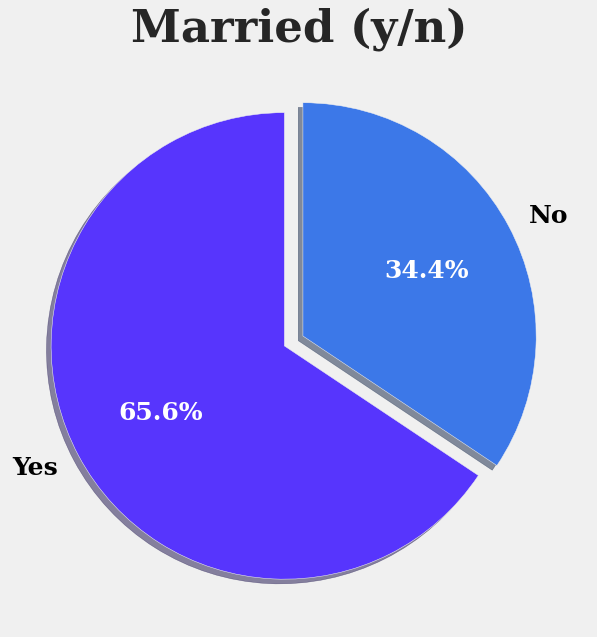

In [29]:
married_data = data.ever_married.value_counts()

explode = (0.07, 0.02)
pie_colors = ('#5735FD', '#3C78E8')

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(married_data,
                               labels=married_data.index,
                               explode=explode,
                               colors=pie_colors,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 25,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Married (y/n)', size=45, **hfont)

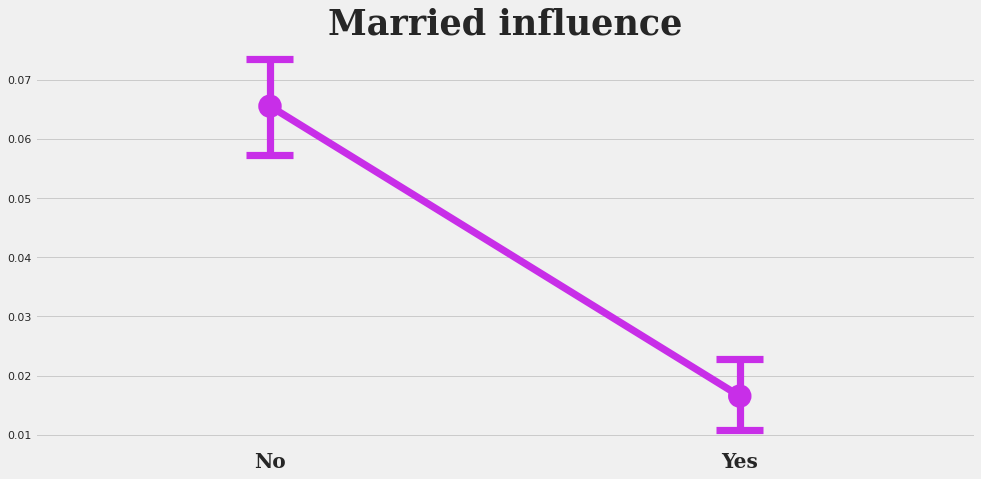

In [30]:

def married_plot(data, col_name):

    married_data = data[[col_name, 'stroke']]

    color = np.random.choice(five_colors, 1)[0]
    plt.figure(figsize=(15, 7))
    married = sns.pointplot(x=col_name, y='stroke',
                            dodge=0.1, capsize=.1,
                            data=married_data,
                            color=color)
    married.set_title('Married influence', fontsize=35, **hfont)
    married.set(xlabel=None, ylabel=None)
    married.set_xticklabels(['No', 'Yes'], size=20, **hfont)


married_plot(data, 'ever_married')

### Work type:
- children
- government job
- never worked
- private
- self-employed

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, '')]

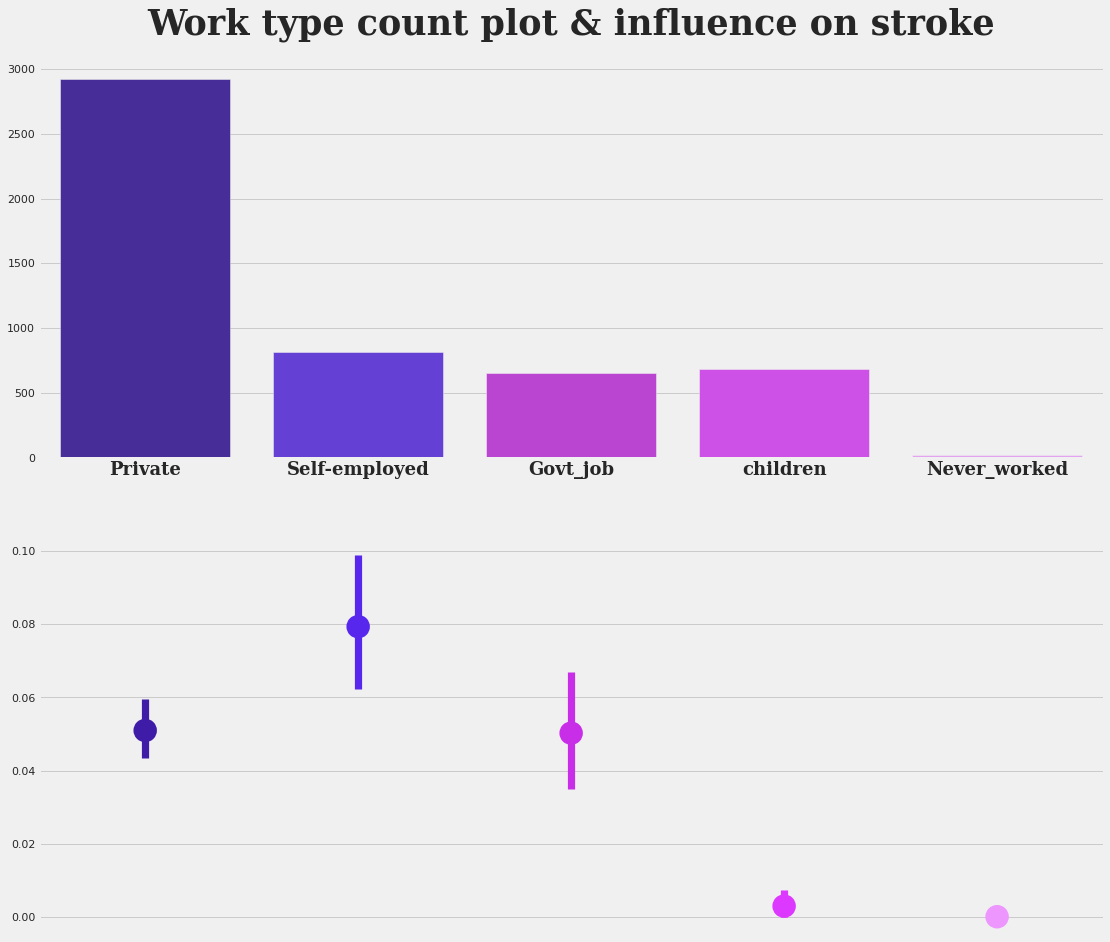

In [31]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
work_type_plot = sns.countplot(x=data.work_type, ax=ax1, palette=five_colors)
work_type_plot.set_title('Work type count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05, **hfont)
work_type_plot.set(xlabel=None,
                   ylabel=None)
work_type_plot.set_xticklabels(work_type_plot.get_xticklabels(),
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
work_type_cat = sns.pointplot(x=data.work_type, y='stroke', data=data,
             ax=ax2, palette=five_colors)
work_type_cat.set(xlabel=None,
                   ylabel=None)
work_type_cat.set_xticklabels([])

### Conclusion:
Although the graph shows that these properties do not have
a strong influence on the result, it should be noted that
in children and those who have never worked,
the risk of the disease is almost always 0

### Residence type:
- Rural
- Urban

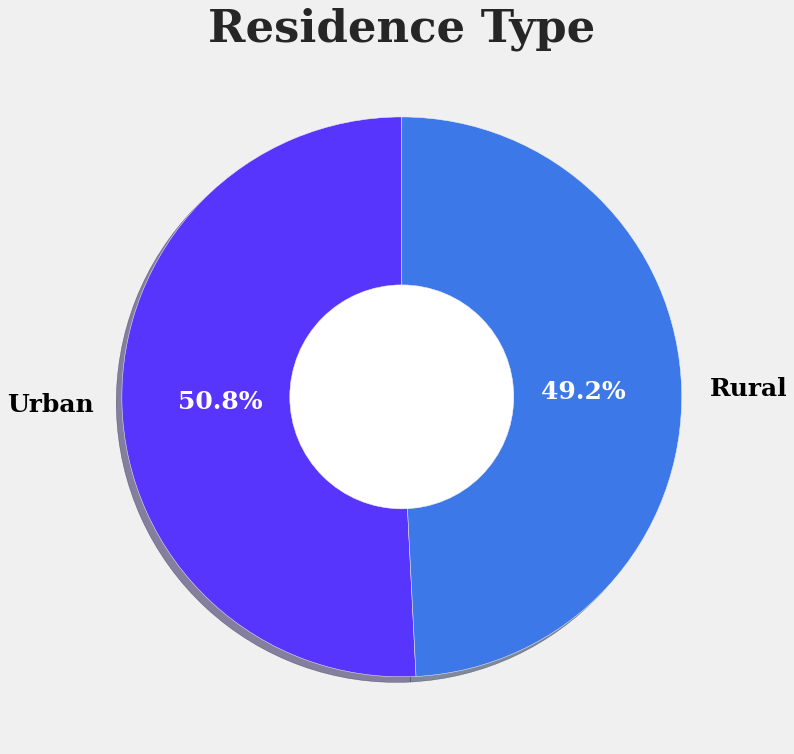

In [32]:
residence_data = data.Residence_type.value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(residence_data,
                               labels=residence_data.index,
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Residence Type', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

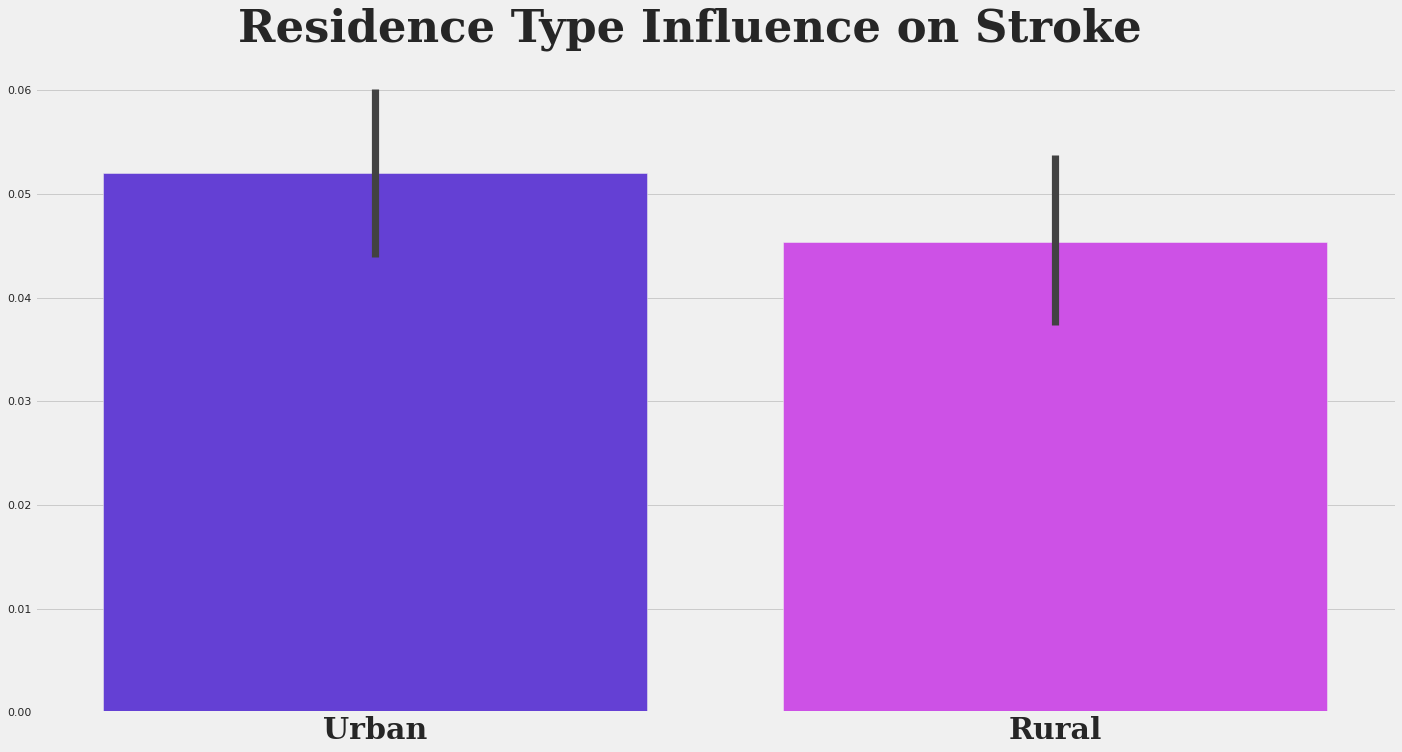

In [33]:
residence_plot = sns.catplot(x='Residence_type', y='stroke', data=data,
                             height=10, aspect=2, kind='bar',
                             palette=two_colors[::-1])
residence_plot.set_xticklabels(['Urban', 'Rural'],
                               size=30, **hfont)
residence_plot.fig.suptitle('Residence Type Influence on Stroke',
                            size=45, y=1.05, **hfont)
residence_plot.set(xlabel=None, ylabel=None)

### Average glucose level in blood

Text(0.5, 0, 'AVG glucose lvl')

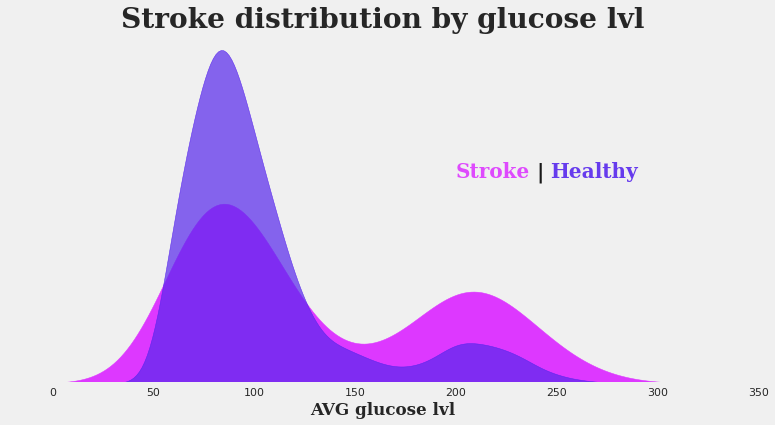

In [34]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by glucose lvl', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(200, 0.01, 'Stroke', {'font': 'Serif',
                              'size': '20',
                              'weight': 'bold',
                              'color': two_colors[0]}, alpha=0.9)

ax.text(240, 0.01, '|', {'font': 'Serif',
                         'size': '20',
                         'weight': 'bold',
                         'color': 'black'}, alpha=0.9)

ax.text(247, 0.01, 'Healthy', {'font': 'Serif',
                               'size': '20',
                               'weight': 'bold',
                               'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[data.stroke == 1],
            x='avg_glucose_level', shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data=data[data.stroke == 0],
            x='avg_glucose_level', shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)
plt.xlabel('AVG glucose lvl', **hfont)

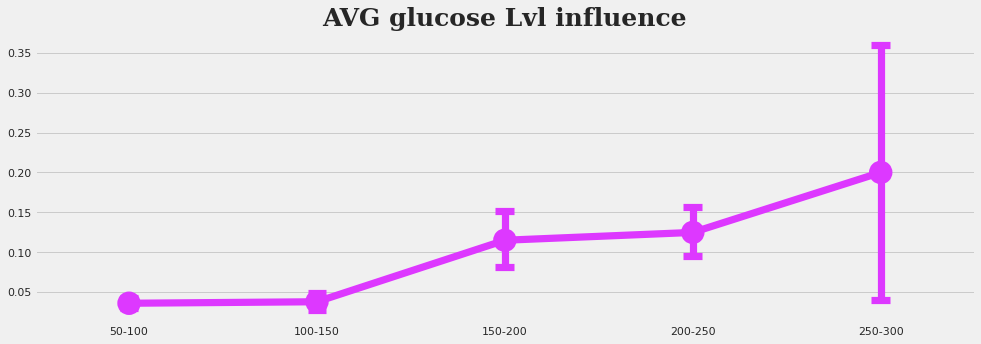

In [35]:

def avg_glucose_plot(data, col_name):

    avg_glucose_data = data[[col_name, 'stroke']]
    avg_glucose_data[col_name] = pd.cut(avg_glucose_data[col_name],
                               bins=[50, 100, 150, 200, 250, 300],
                               labels=['50-100',
                                       '100-150',
                                       '150-200',
                                       '200-250',
                                       '250-300'])

    color = np.random.choice(five_colors, 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=avg_glucose_data, color=color)
    plot.set_title(f'AVG glucose Lvl influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


avg_glucose_plot(data, 'avg_glucose_level')

### BMI (body mass index)

Text(0.5, 0, 'BMI')

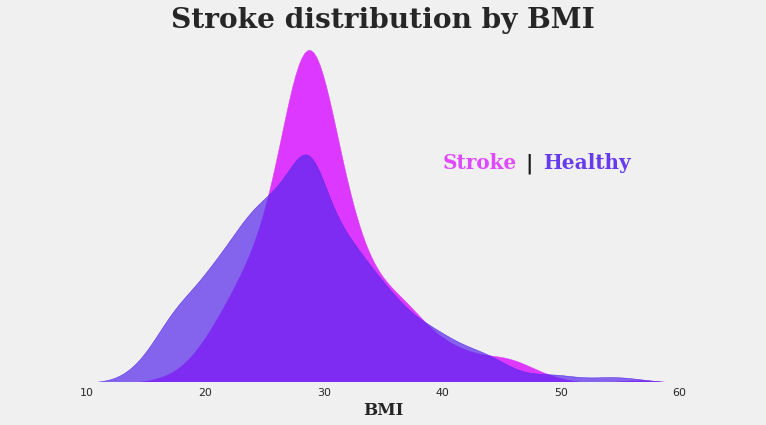

In [36]:


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.title('Stroke distribution by BMI', size=28, **hfont)
ax.grid(False)
ax.axes.get_yaxis().set_visible(False)
ax.text(40, 0.06, 'Stroke', {'font': 'Serif',
                             'size': '20',
                             'weight': 'bold',
                             'color': two_colors[0]}, alpha=0.9)

ax.text(47, 0.06, '|', {'font': 'Serif',
                        'size': '20',
                        'weight': 'bold',
                        'color': 'black'}, alpha=0.9)

ax.text(48.5, 0.06, 'Healthy', {'font': 'Serif',
                                'size': '20',
                                'weight': 'bold',
                                'color': two_colors[1]}, alpha=0.9)

sns.kdeplot(data=data[(data.stroke == 1) & (data.bmi < 60)],
            x='bmi', shade=True, ax=ax, color=two_colors[0],
            alpha=1)
sns.kdeplot(data=data[(data.stroke == 0) & (data.bmi < 60)],
            x='bmi', shade=True, ax=ax, color=two_colors[1],
            alpha=0.7)
plt.xlabel('BMI', **hfont)

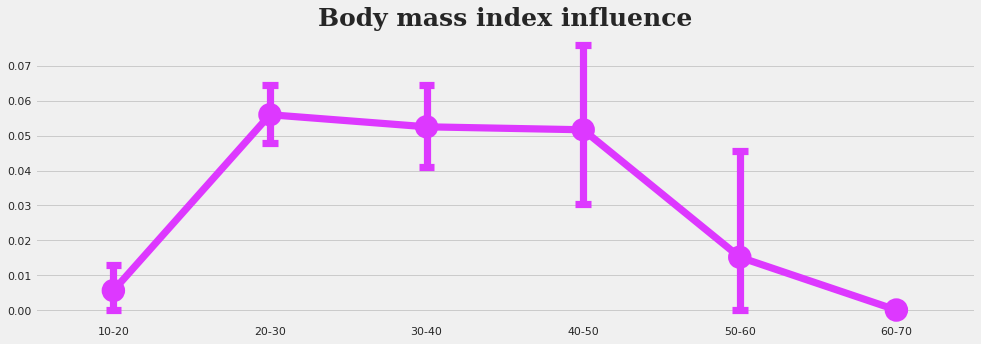

In [37]:
def bmi_plot(data, col_name):

    bmi_data = data[[col_name, 'stroke']]
    bmi_data[col_name] = pd.cut(bmi_data[col_name],
                               bins=[10, 20, 30, 40, 50, 60, 70],
                               labels=['10-20',
                                       '20-30',
                                       '30-40',
                                       '40-50',
                                       '50-60',
                                       '60-70'])

    color = np.random.choice(five_colors, 1)[0]
    plt.figure(figsize=(15, 5))
    plot = sns.pointplot(x=col_name, y='stroke',
                  dodge=0.1, capsize=.1, data=bmi_data, color=color)
    plot.set_title(f'Body mass index influence', fontsize=25, **hfont)
    plot.set(xlabel=None, ylabel=None)


bmi_plot(data, 'bmi')

### Smoking status:
- formerly smoked
- never smoked
- smokes
- Unknown

[Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, ''), Text(3, 0, '')]

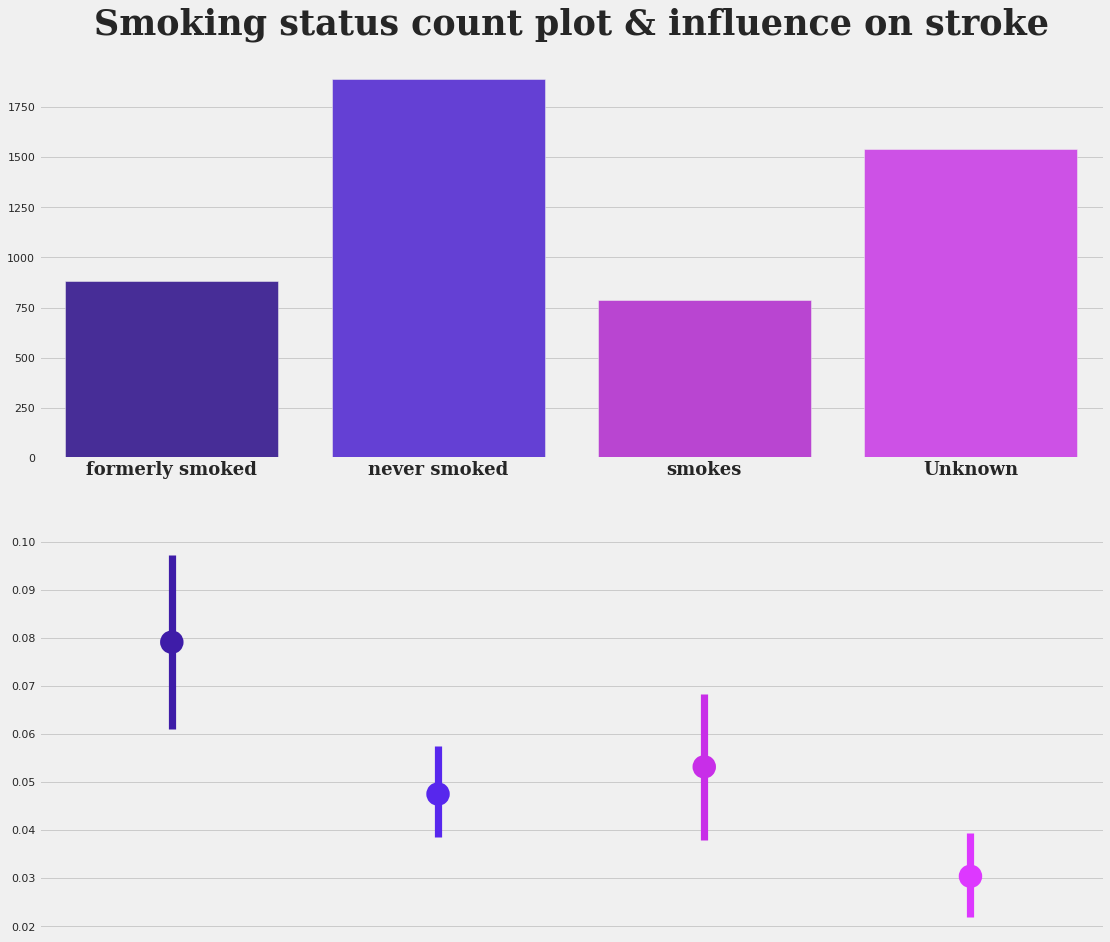

In [38]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
smoke_plot = sns.countplot(x=data.smoking_status, ax=ax1, palette=five_colors)
smoke_plot.set_title('Smoking status count plot &'
                         ' influence on stroke',
                         fontsize=35, y=1.05, **hfont)
smoke_plot.set(xlabel=None,
                   ylabel=None)
smoke_plot.set_xticklabels(smoke_plot.get_xticklabels(),
                                size=18, **hfont)


ax2 = fig.add_subplot(grid[1, :])
smoke_cat = sns.pointplot(x=data.smoking_status, y='stroke', data=data,
             ax=ax2, palette=five_colors)
smoke_cat.set(xlabel=None,
                   ylabel=None)
smoke_cat.set_xticklabels([])

### Coding categorical data

In [39]:
cat_columns = [cname for cname in data.columns
                        if data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

### Heatmap

<AxesSubplot:>

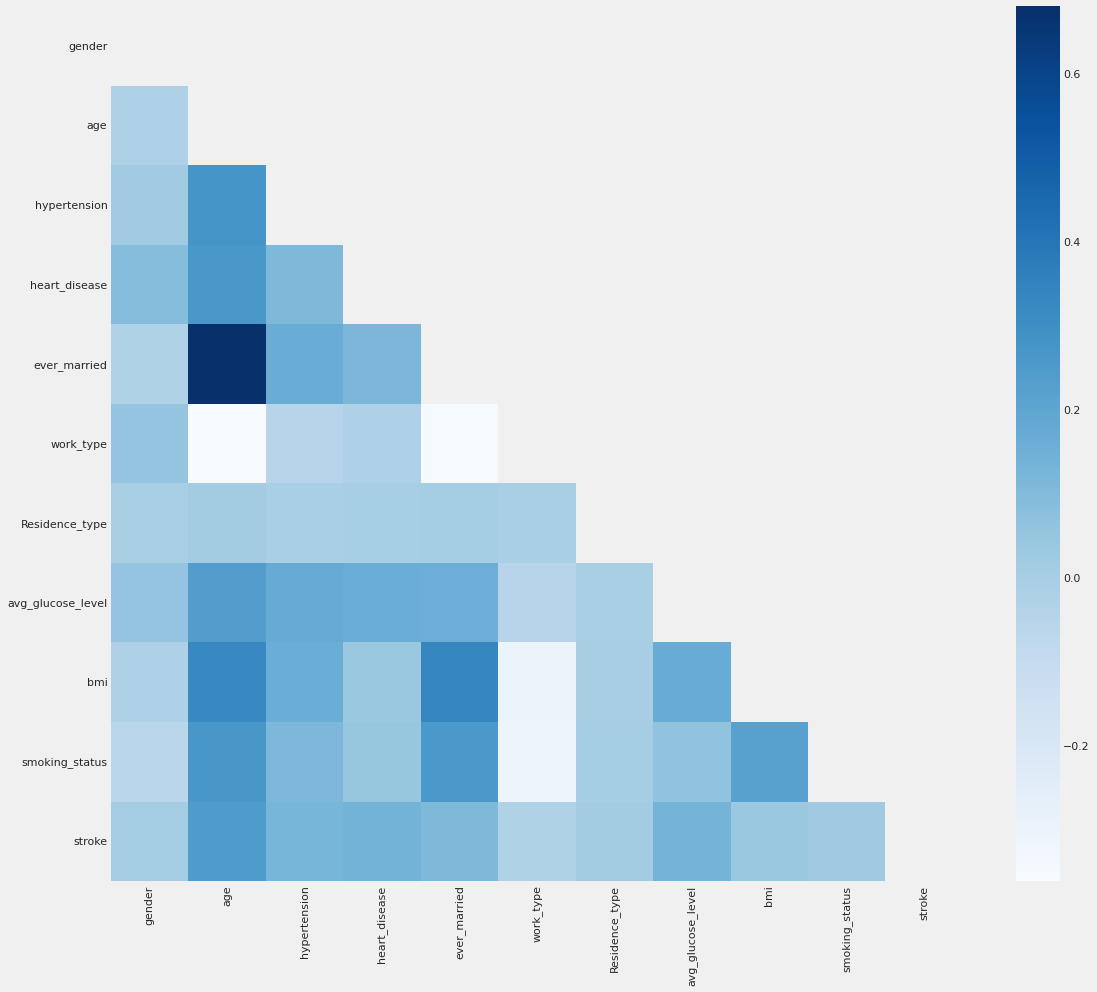

In [40]:
plt.figure(figsize=(17, 15))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map

# Data for Model
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

### ~~Work with categorical columns~~

### This paragraph was made in the previous step to take a closer look at the heatmap

### Now, let’s look at a few first lines that we got after coding

In [41]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1


### Divide by X and y

In [42]:
X = data.drop(['stroke'], axis=1)
y = data.stroke

### Smote

In [43]:
# Correct installation

# Installation the package:
# For PyCharm (Mac OS) : pip3 install imbalanced-learn
# For PyCharm (Windows): pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Model
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/external-training-lineal-.png?raw=true" width="100"/>

## Such models will be uncovered:
1. ML (Machine learning) models
    1. Random Forest Classifier
    2. kNN (K-Nearest Neighbours)
    3. GradientBoostingClassifier
2. Artificial Neural network

# Machine Learning models

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/ml%20models.png?raw=true" width="100"/>

In [44]:
from sklearn.metrics import precision_score, f1_score, recall_score

models_results = np.zeros(4)

def show_training_results(X, y, model_name, model, split_share=0.3, **kwargs):

    print(f'The model {model_name} with parameters : {kwargs}')
    m = model(**kwargs)

    sm = SMOTE(random_state=0)

    X, y = sm.fit_resample(X, y)

    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=split_share, random_state=rnd_state)

    m.fit(X_train, y_train)

    score = m.score(X_test, y_test)

    prediction = m.predict(X_test)

    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    F1 = f1_score(y_test, prediction)

    print('\n'*2)
    print(f'Model {model_name}')
    print()
    print(f'Score     ========>>> {score:.{3}f}\n')
    print()
    print(f'Precision ========>>> {precision:.{3}f}\n')
    print()
    print(f'Recall    ========>>> {recall:.{3}f}\n')
    print()
    print(f'F1        ========>>> {F1:.{3}f}\n')

    plot_conf_mat(m, X_test, y_test)

    return score


def plot_conf_mat(model, X_test, y_test):

    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_pred, y_test)

    df_cm = pd.DataFrame(matrix, index = ['Stroke', 'Normal'],
                                columns = ['Stroke', 'Normal'])
    plt.figure(figsize = (12,8))
    sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
    plt.xlabel('Predicted values', fontsize = 20, **hfont)
    plt.ylabel('True values', fontsize = 20, **hfont)
    plt.show()

# Random Forest
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/forest.png?raw=true" width="100"/>

The model RF with parameters : {'n_estimators': 500, 'n_jobs': -1, 'random_state': 0}



Model RF

Score     ========>>> 0.943


Precision ========>>> 0.928


Recall    ========>>> 0.961


F1        ========>>> 0.944



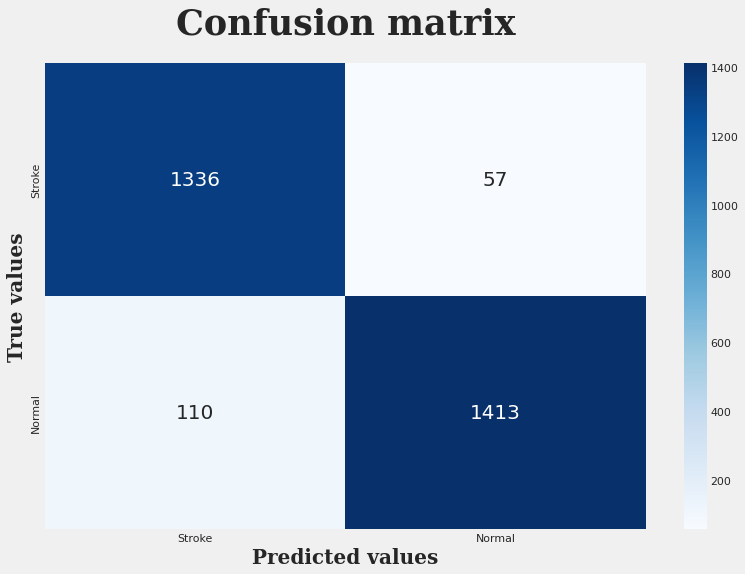

In [45]:
rnd_state = 0

models_results[0] =   show_training_results(X, y,
                      'RF',
                      RandomForestClassifier,
                      n_estimators=500,
                      n_jobs=-1,
                      random_state=rnd_state)

# K-Nearest Neighbours
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/near-me.png?raw=true" width="100"/>

The model kNN with parameters : {'n_neighbors': 1, 'algorithm': 'kd_tree', 'weights': 'uniform'}



Model kNN

Score     ========>>> 0.911


Precision ========>>> 0.867


Recall    ========>>> 0.973


F1        ========>>> 0.917



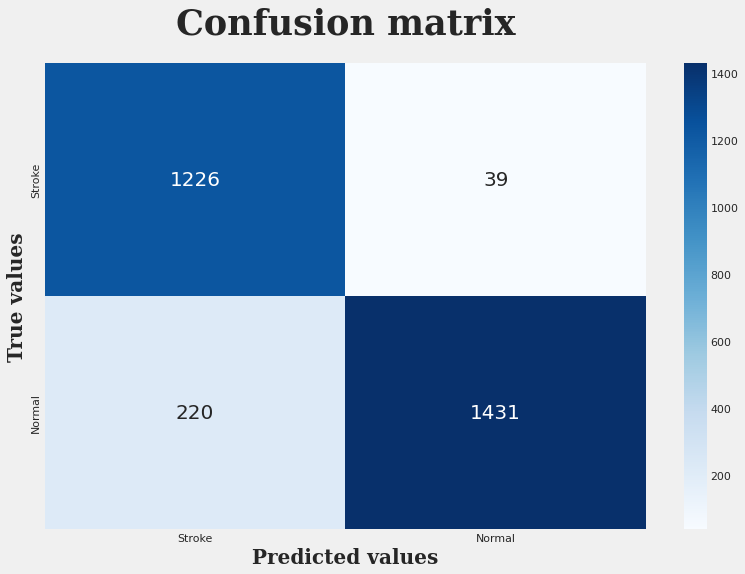

In [46]:
models_results[1] =   show_training_results(X, y,
                      'kNN',
                      KNeighborsClassifier,
                      n_neighbors=1,
                      algorithm='kd_tree',
                      weights='uniform')

# GradientBoostingClassifier
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/boost-grad.png?raw=true" width="100"/>

The model GradBoost with parameters : {'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 70, 'max_features': 2, 'n_estimators': 300}



Model GradBoost

Score     ========>>> 0.945


Precision ========>>> 0.941


Recall    ========>>> 0.950


F1        ========>>> 0.946



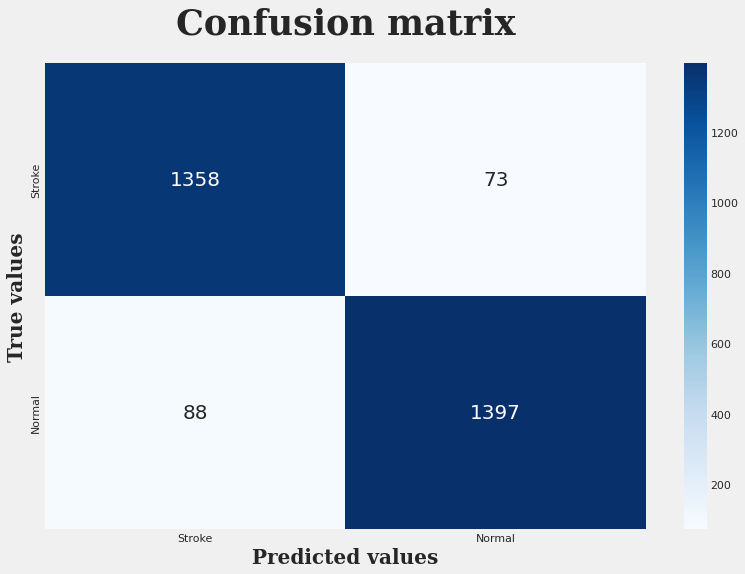

In [47]:
models_results[2] =   show_training_results(X, y,
                      'GradBoost',
                      GradientBoostingClassifier,
                      learning_rate=0.01,
                      loss='exponential',
                      max_depth=70,
                      max_features=2,
                      n_estimators=300)

# ANN (Artificial Neural Network)
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/neural%20net.png?raw=true" width="100"/>

In [48]:
os.environ["KMP_SETTINGS"] = "false" # to avoid a huge warning about sort of settings

In [49]:
def neural_net_results(X, y):

    sm = SMOTE(random_state=0)

    X, y = sm.fit_resample(X, y)

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25,
                                                      random_state=rnd_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=30, epochs=150,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score     ========>>> {score}')

    history_plot(history)

    return score


def history_plot(history):

    fig = plt.figure(figsize=(12, 8))
    plt.title('Accuracy of ANN', size=35, **hfont)
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)

2022-02-21 16:32:19.423325: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-21 16:32:19.630901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Neural Network score     ========>>> 0.923


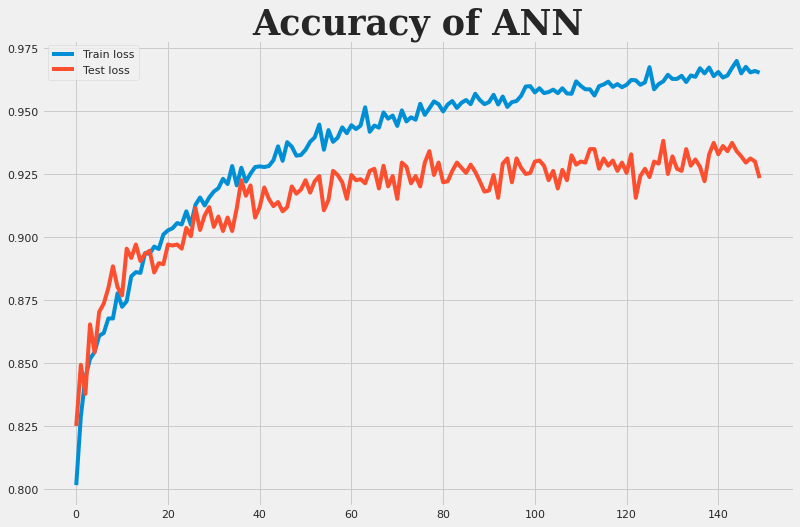

In [50]:
models_results[-1] = neural_net_results(X, y)

## Neural Network structure
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/structure.png?raw=true" width="100"/>

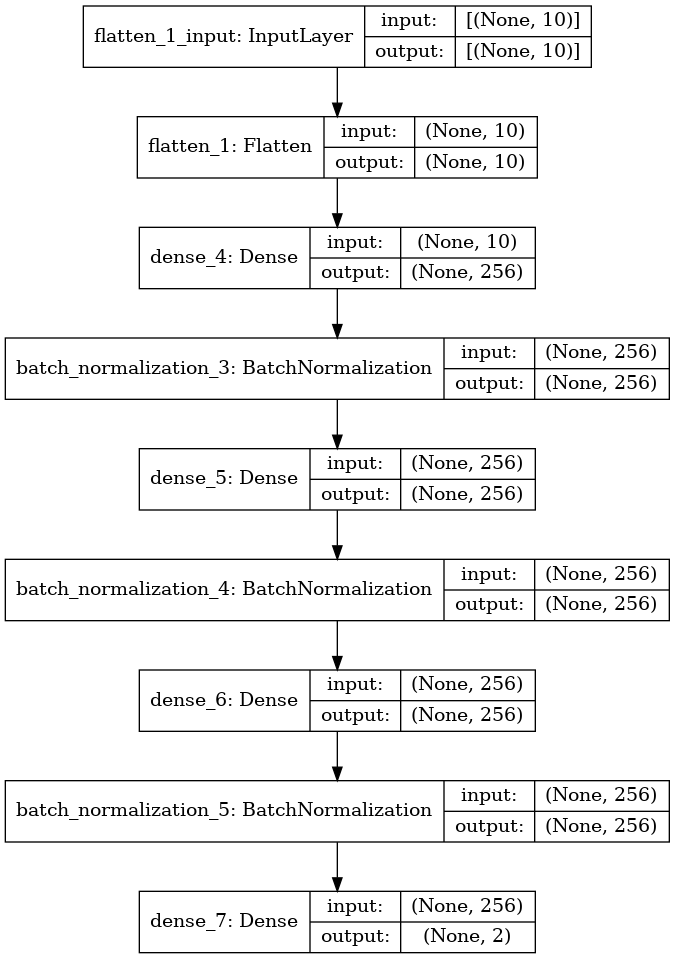

In [51]:
plot_model(keras.Sequential([
        keras.layers.Flatten(input_dim=X.shape[1]),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation='softmax')
    ]), show_shapes=True)

# Models Evaluating
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/evaluate.png?raw=true" width="100"/>

### Aggregation of results into one dataset

In [52]:
models_results = pd.DataFrame(models_results, columns=['Result'])
models_results['Model name'] = \
    ['Random Forest', 'kNN', 'Gradient Boosting', 'ANN']
models_results.sort_values(by=['Result'], inplace=True)

### Accuracy plot for each model type

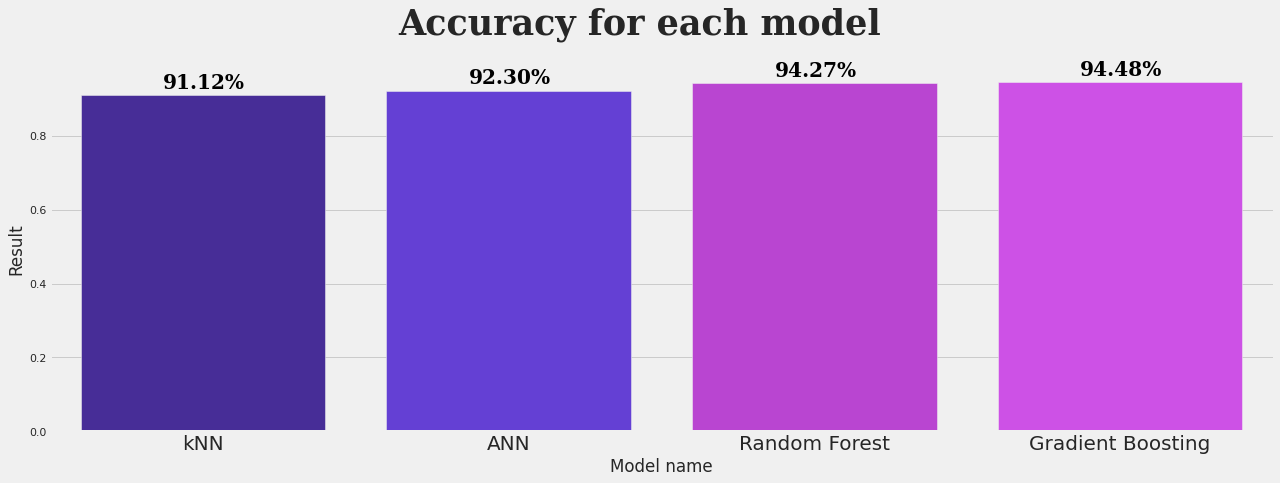

In [53]:
g = sns.catplot(x='Model name', y='Result', data=models_results,
                height=6, aspect=3, kind='bar', legend=True, palette=five_colors)
g.fig.suptitle('Accuracy for each model', size=35, y=1.1, **hfont)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large', **hfont)

# <center>Conclusions</center>
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/conclusion.png?raw=true" width="100"/>

---

## Data analysis:
- In this work, we looked at some tools that can be used for EDA (Exploratory data analysis):
  - categorical plot
  - count plot
  - several version of pie plot.
- We used a special construction of a distribution diagram with text and special visualization
- Also, we have identified certain circumstances (factors) that have a bearing on the outcome of the examination of patients.

## Application of models:
- In the most cases Gradient Boosting shows the best results in prediction (~94.3% accuracy)
- kNN was the worst performer

## <center>Notebooks that also use machine learning:</center>

### [Water Quality prediction](https://www.kaggle.com/galaxygeorge/water-quality-prediction-eda-model)
### [Heart Failure prediction](https://www.kaggle.com/galaxygeorge/heart-failure-prediction-eda-fe-model)
### [Customer Churn](https://www.kaggle.com/galaxygeorge/customer-churn-modeling-eda-fe-model)
### [House price prediction](https://www.kaggle.com/galaxygeorge/house-price-prediction-eda-fe-model)

# <center> Thank You ! </center>

<img height="150" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/thank-you.png?raw=true" width="150"/>

## <center> If you have found something useful for yourself in my work , please evaluate and comment </center>

![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)